# Python Machine Learning - Code Examples

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

last updated: 2019-02-03 

CPython 3.6.8
IPython 6.2.1

numpy 1.15.4
tensorflow 2.0.0-preview
matplotlib 3.0.2


*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

# Chapter 14 - Going Deeper: The Mechanics of TensorFlow

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## TensorFlow in a nutshell

**How to get the rank and shape of a tensor**

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## Understanding TensorFlow's computation graph

In [4]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [5]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [6]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [7]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [8]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [9]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [10]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [11]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [12]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## Working with TensorFlow’s variables, and operations

### Variables in TensorFlow


#### Defining Variables

In [13]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [14]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [15]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [16]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [17]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [18]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [19]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [20]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## 케라스 API 자세히 배우기

### Sequential 모델

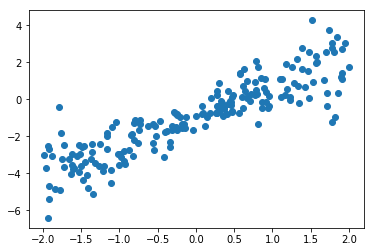

In [21]:
## create a random toy dataset for regression

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
# plt.savefig('images/14_03.png', dpi=300)
plt.show()

In [22]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=1, input_dim=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 649us/sample - loss: 2.9895 - val_loss: 2.0497
Epoch 2/500
105/105==============================] - 0s 57us/sample - loss: 2.9448 - val_loss: 2.0258
Epoch 3/500
105/105==============================] - 0s 35us/sample - loss: 2.9010 - val_loss: 2.0015
Epoch 4/500
105/105==============================] - 0s 43us/sample - loss: 2.8565 - val_loss: 1.9777
Epoch 5/500
105/105==============================] - 0s 44us/sample - loss: 2.8134 - val_loss: 1.9544
Epoch 6/500
105/105==============================] - 0s 37us/sample - loss: 2.7707 - val_loss: 1.9333
Epoch 7/500
105/105==============================] - 0s 43us/sample - loss: 2.7328 - val_loss: 1.9126
Epoch 8/500
105/105==============================] - 0s 38us/sample - loss: 2.6940 - val_loss: 1.8916
Epoch 9/500
105/105==============================] - 0s 44us/sample - loss: 2.6553 - val_loss: 1.8706
Epoch 10/500
105/105================

105/105==============================] - 0s 36us/sample - loss: 1.2188 - val_loss: 1.1070
Epoch 81/500
105/105==============================] - 0s 42us/sample - loss: 1.2091 - val_loss: 1.1022
Epoch 82/500
105/105==============================] - 0s 35us/sample - loss: 1.2002 - val_loss: 1.0980
Epoch 83/500
105/105==============================] - 0s 47us/sample - loss: 1.1921 - val_loss: 1.0936
Epoch 84/500
105/105==============================] - 0s 51us/sample - loss: 1.1840 - val_loss: 1.0898
Epoch 85/500
105/105==============================] - 0s 43us/sample - loss: 1.1765 - val_loss: 1.0845
Epoch 86/500
105/105==============================] - 0s 43us/sample - loss: 1.1670 - val_loss: 1.0805
Epoch 87/500
105/105==============================] - 0s 36us/sample - loss: 1.1597 - val_loss: 1.0767
Epoch 88/500
105/105==============================] - 0s 46us/sample - loss: 1.1524 - val_loss: 1.0729
Epoch 89/500
105/105==============================] - 0s 39us/sample - loss: 1.1453 - 

105/105==============================] - 0s 37us/sample - loss: 0.8542 - val_loss: 0.9200
Epoch 160/500
105/105==============================] - 0s 35us/sample - loss: 0.8522 - val_loss: 0.9188
Epoch 161/500
105/105==============================] - 0s 39us/sample - loss: 0.8503 - val_loss: 0.9180
Epoch 162/500
105/105==============================] - 0s 42us/sample - loss: 0.8484 - val_loss: 0.9171
Epoch 163/500
105/105==============================] - 0s 37us/sample - loss: 0.8461 - val_loss: 0.9157
Epoch 164/500
105/105==============================] - 0s 36us/sample - loss: 0.8437 - val_loss: 0.9149
Epoch 165/500
105/105==============================] - 0s 35us/sample - loss: 0.8424 - val_loss: 0.9141
Epoch 166/500
105/105==============================] - 0s 59us/sample - loss: 0.8402 - val_loss: 0.9131
Epoch 167/500
105/105==============================] - 0s 36us/sample - loss: 0.8387 - val_loss: 0.9123
Epoch 168/500
105/105==============================] - 0s 43us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 37us/sample - loss: 0.7790 - val_loss: 0.8889
Epoch 239/500
105/105==============================] - 0s 35us/sample - loss: 0.7785 - val_loss: 0.8889
Epoch 240/500
105/105==============================] - 0s 36us/sample - loss: 0.7782 - val_loss: 0.8889
Epoch 241/500
105/105==============================] - 0s 44us/sample - loss: 0.7776 - val_loss: 0.8890
Epoch 242/500
105/105==============================] - 0s 35us/sample - loss: 0.7771 - val_loss: 0.8888
Epoch 243/500
105/105==============================] - 0s 40us/sample - loss: 0.7768 - val_loss: 0.8890
Epoch 244/500
105/105==============================] - 0s 49us/sample - loss: 0.7766 - val_loss: 0.8888
Epoch 245/500
105/105==============================] - 0s 45us/sample - loss: 0.7761 - val_loss: 0.8885
Epoch 246/500
105/105==============================] - 0s 35us/sample - loss: 0.7761 - val_loss: 0.8884
Epoch 247/500
105/105==============================] - 0s 45us/s

Epoch 317/500
105/105==============================] - 0s 35us/sample - loss: 0.7606 - val_loss: 0.8903
Epoch 318/500
105/105==============================] - 0s 39us/sample - loss: 0.7605 - val_loss: 0.8905
Epoch 319/500
105/105==============================] - 0s 47us/sample - loss: 0.7605 - val_loss: 0.8906
Epoch 320/500
105/105==============================] - 0s 49us/sample - loss: 0.7605 - val_loss: 0.8905
Epoch 321/500
105/105==============================] - 0s 34us/sample - loss: 0.7603 - val_loss: 0.8904
Epoch 322/500
105/105==============================] - 0s 49us/sample - loss: 0.7601 - val_loss: 0.8906
Epoch 323/500
105/105==============================] - 0s 47us/sample - loss: 0.7601 - val_loss: 0.8906
Epoch 324/500
105/105==============================] - 0s 42us/sample - loss: 0.7600 - val_loss: 0.8907
Epoch 325/500
105/105==============================] - 0s 37us/sample - loss: 0.7599 - val_loss: 0.8904
Epoch 326/500
105/105==============================] - 0s 44us/s

Epoch 396/500
105/105==============================] - 0s 34us/sample - loss: 0.7569 - val_loss: 0.8941
Epoch 397/500
105/105==============================] - 0s 36us/sample - loss: 0.7570 - val_loss: 0.8940
Epoch 398/500
105/105==============================] - 0s 34us/sample - loss: 0.7568 - val_loss: 0.8940
Epoch 399/500
105/105==============================] - 0s 37us/sample - loss: 0.7568 - val_loss: 0.8941
Epoch 400/500
105/105==============================] - 0s 34us/sample - loss: 0.7567 - val_loss: 0.8943
Epoch 401/500
105/105==============================] - 0s 42us/sample - loss: 0.7566 - val_loss: 0.8943
Epoch 402/500
105/105==============================] - 0s 35us/sample - loss: 0.7566 - val_loss: 0.8947
Epoch 403/500
105/105==============================] - 0s 35us/sample - loss: 0.7566 - val_loss: 0.8947
Epoch 404/500
105/105==============================] - 0s 56us/sample - loss: 0.7566 - val_loss: 0.8948
Epoch 405/500
105/105==============================] - 0s 39us/s

Epoch 475/500
105/105==============================] - 0s 40us/sample - loss: 0.7559 - val_loss: 0.8995
Epoch 476/500
105/105==============================] - 0s 58us/sample - loss: 0.7558 - val_loss: 0.8999
Epoch 477/500
105/105==============================] - 0s 44us/sample - loss: 0.7558 - val_loss: 0.8995
Epoch 478/500
105/105==============================] - 0s 46us/sample - loss: 0.7559 - val_loss: 0.8996
Epoch 479/500
105/105==============================] - 0s 50us/sample - loss: 0.7558 - val_loss: 0.8997
Epoch 480/500
105/105==============================] - 0s 35us/sample - loss: 0.7558 - val_loss: 0.9003
Epoch 481/500
105/105==============================] - 0s 36us/sample - loss: 0.7559 - val_loss: 0.9001
Epoch 482/500
105/105==============================] - 0s 58us/sample - loss: 0.7558 - val_loss: 0.8998
Epoch 483/500
105/105==============================] - 0s 42us/sample - loss: 0.7558 - val_loss: 0.9000
Epoch 484/500
105/105==============================] - 0s 41us/s

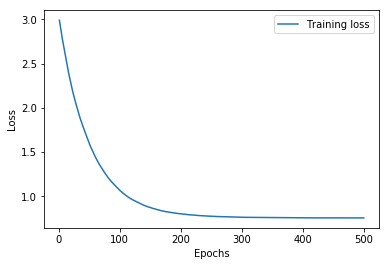

In [26]:
epochs = np.arange(1, 500+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API

In [27]:
from tensorflow.keras import Model, Input

input = Input(shape=(1,))
output = Dense(1)(input)

model = Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 773us/sample - loss: 9.2841 - val_loss: 6.2274
Epoch 2/500
105/105==============================] - 0s 38us/sample - loss: 9.0943 - val_loss: 6.1124
Epoch 3/500
105/105==============================] - 0s 42us/sample - loss: 8.9109 - val_loss: 6.0089
Epoch 4/500
105/105==============================] - 0s 42us/sample - loss: 8.7440 - val_loss: 5.8910
Epoch 5/500
105/105==============================] - 0s 35us/sample - loss: 8.5630 - val_loss: 5.7859
Epoch 6/500
105/105==============================] - 0s 40us/sample - loss: 8.3956 - val_loss: 5.6774
Epoch 7/500
105/105==============================] - 0s 37us/sample - loss: 8.2235 - val_loss: 5.5782
Epoch 8/500
105/105==============================] - 0s 32us/sample - loss: 8.0642 - val_loss: 5.4855
Epoch 9/500
105/105==============================] - 0s 42us/sample - loss: 7.9170 - val_loss: 5.3886
Epoch 10/500
105/105================

105/105==============================] - 0s 42us/sample - loss: 2.2568 - val_loss: 1.9008
Epoch 81/500
105/105==============================] - 0s 43us/sample - loss: 2.2271 - val_loss: 1.8826
Epoch 82/500
105/105==============================] - 0s 42us/sample - loss: 2.1979 - val_loss: 1.8599
Epoch 83/500
105/105==============================] - 0s 36us/sample - loss: 2.1653 - val_loss: 1.8418
Epoch 84/500
105/105==============================] - 0s 34us/sample - loss: 2.1368 - val_loss: 1.8228
Epoch 85/500
105/105==============================] - 0s 51us/sample - loss: 2.1085 - val_loss: 1.8036
Epoch 86/500
105/105==============================] - 0s 43us/sample - loss: 2.0776 - val_loss: 1.7830
Epoch 87/500
105/105==============================] - 0s 35us/sample - loss: 2.0468 - val_loss: 1.7635
Epoch 88/500
105/105==============================] - 0s 51us/sample - loss: 2.0188 - val_loss: 1.7465
Epoch 89/500
105/105==============================] - 0s 42us/sample - loss: 1.9931 - 

105/105==============================] - 0s 36us/sample - loss: 1.0203 - val_loss: 1.0982
Epoch 160/500
105/105==============================] - 0s 52us/sample - loss: 1.0148 - val_loss: 1.0936
Epoch 161/500
105/105==============================] - 0s 46us/sample - loss: 1.0084 - val_loss: 1.0892
Epoch 162/500
105/105==============================] - 0s 37us/sample - loss: 1.0023 - val_loss: 1.0856
Epoch 163/500
105/105==============================] - 0s 57us/sample - loss: 0.9977 - val_loss: 1.0812
Epoch 164/500
105/105==============================] - 0s 36us/sample - loss: 0.9922 - val_loss: 1.0781
Epoch 165/500
105/105==============================] - 0s 39us/sample - loss: 0.9877 - val_loss: 1.0756
Epoch 166/500
105/105==============================] - 0s 41us/sample - loss: 0.9835 - val_loss: 1.0725
Epoch 167/500
105/105==============================] - 0s 37us/sample - loss: 0.9788 - val_loss: 1.0685
Epoch 168/500
105/105==============================] - 0s 36us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 35us/sample - loss: 0.8044 - val_loss: 0.9495
Epoch 239/500
105/105==============================] - 0s 33us/sample - loss: 0.8031 - val_loss: 0.9488
Epoch 240/500
105/105==============================] - 0s 43us/sample - loss: 0.8020 - val_loss: 0.9478
Epoch 241/500
105/105==============================] - 0s 34us/sample - loss: 0.8009 - val_loss: 0.9472
Epoch 242/500
105/105==============================] - 0s 59us/sample - loss: 0.7998 - val_loss: 0.9461
Epoch 243/500
105/105==============================] - 0s 35us/sample - loss: 0.7988 - val_loss: 0.9462
Epoch 244/500
105/105==============================] - 0s 50us/sample - loss: 0.7979 - val_loss: 0.9455
Epoch 245/500
105/105==============================] - 0s 36us/sample - loss: 0.7972 - val_loss: 0.9445
Epoch 246/500
105/105==============================] - 0s 34us/sample - loss: 0.7961 - val_loss: 0.9441
Epoch 247/500
105/105==============================] - 0s 46us/s

Epoch 317/500
105/105==============================] - 0s 49us/sample - loss: 0.7642 - val_loss: 0.9169
Epoch 318/500
105/105==============================] - 0s 56us/sample - loss: 0.7641 - val_loss: 0.9167
Epoch 319/500
105/105==============================] - 0s 38us/sample - loss: 0.7639 - val_loss: 0.9166
Epoch 320/500
105/105==============================] - ETA: 0s - loss: 0.690 - 0s 51us/sample - loss: 0.7636 - val_loss: 0.9164
Epoch 321/500
105/105==============================] - 0s 53us/sample - loss: 0.7636 - val_loss: 0.9160
Epoch 322/500
105/105==============================] - 0s 42us/sample - loss: 0.7632 - val_loss: 0.9156
Epoch 323/500
105/105==============================] - 0s 35us/sample - loss: 0.7633 - val_loss: 0.9152
Epoch 324/500
105/105==============================] - 0s 47us/sample - loss: 0.7631 - val_loss: 0.9152
Epoch 325/500
105/105==============================] - 0s 49us/sample - loss: 0.7629 - val_loss: 0.9158
Epoch 326/500
105/105===================

105/105==============================] - 0s 38us/sample - loss: 0.7573 - val_loss: 0.9096
Epoch 396/500
105/105==============================] - 0s 32us/sample - loss: 0.7572 - val_loss: 0.9093
Epoch 397/500
105/105==============================] - 0s 34us/sample - loss: 0.7573 - val_loss: 0.9090
Epoch 398/500
105/105==============================] - 0s 36us/sample - loss: 0.7571 - val_loss: 0.9090
Epoch 399/500
105/105==============================] - 0s 56us/sample - loss: 0.7573 - val_loss: 0.9088
Epoch 400/500
105/105==============================] - 0s 42us/sample - loss: 0.7569 - val_loss: 0.9085
Epoch 401/500
105/105==============================] - 0s 37us/sample - loss: 0.7569 - val_loss: 0.9083
Epoch 402/500
105/105==============================] - 0s 43us/sample - loss: 0.7568 - val_loss: 0.9085
Epoch 403/500
105/105==============================] - 0s 38us/sample - loss: 0.7569 - val_loss: 0.9089
Epoch 404/500
105/105==============================] - 0s 36us/sample - loss: 

Epoch 474/500
105/105==============================] - 0s 32us/sample - loss: 0.7560 - val_loss: 0.9073
Epoch 475/500
105/105==============================] - 0s 33us/sample - loss: 0.7559 - val_loss: 0.9070
Epoch 476/500
105/105==============================] - 0s 33us/sample - loss: 0.7560 - val_loss: 0.9070
Epoch 477/500
105/105==============================] - 0s 35us/sample - loss: 0.7559 - val_loss: 0.9069
Epoch 478/500
105/105==============================] - 0s 33us/sample - loss: 0.7561 - val_loss: 0.9065
Epoch 479/500
105/105==============================] - 0s 37us/sample - loss: 0.7559 - val_loss: 0.9063
Epoch 480/500
105/105==============================] - 0s 34us/sample - loss: 0.7558 - val_loss: 0.9065
Epoch 481/500
105/105==============================] - 0s 35us/sample - loss: 0.7557 - val_loss: 0.9065
Epoch 482/500
105/105==============================] - 0s 34us/sample - loss: 0.7557 - val_loss: 0.9063
Epoch 483/500
105/105==============================] - 0s 32us/s

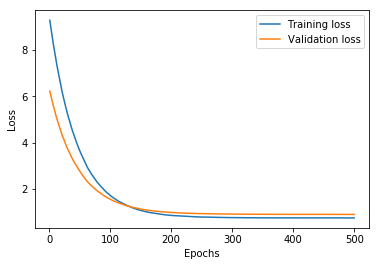

In [29]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 과대적합 해결하기

In [30]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [31]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 1ms/sample - loss: 3.3701 - val_loss: 2.2784
Epoch 2/500
105/105==============================] - 0s 48us/sample - loss: 3.3146 - val_loss: 2.2501
Epoch 3/500
105/105==============================] - 0s 47us/sample - loss: 3.2621 - val_loss: 2.2166
Epoch 4/500
105/105==============================] - 0s 42us/sample - loss: 3.2034 - val_loss: 2.1913
Epoch 5/500
105/105==============================] - 0s 55us/sample - loss: 3.1572 - val_loss: 2.1640
Epoch 6/500
105/105==============================] - 0s 37us/sample - loss: 3.1070 - val_loss: 2.1381
Epoch 7/500
105/105==============================] - 0s 41us/sample - loss: 3.0603 - val_loss: 2.1146
Epoch 8/500
105/105==============================] - 0s 38us/sample - loss: 3.0176 - val_loss: 2.0887
Epoch 9/500
105/105==============================] - 0s 54us/sample - loss: 2.9702 - val_loss: 2.0636
Epoch 10/500
105/105==================

105/105==============================] - 0s 35us/sample - loss: 1.2847 - val_loss: 1.1611
Epoch 81/500
105/105==============================] - 0s 35us/sample - loss: 1.2749 - val_loss: 1.1551
Epoch 82/500
105/105==============================] - 0s 38us/sample - loss: 1.2642 - val_loss: 1.1500
Epoch 83/500
105/105==============================] - 0s 42us/sample - loss: 1.2547 - val_loss: 1.1452
Epoch 84/500
105/105==============================] - 0s 35us/sample - loss: 1.2455 - val_loss: 1.1402
Epoch 85/500
105/105==============================] - 0s 34us/sample - loss: 1.2363 - val_loss: 1.1344
Epoch 86/500
105/105==============================] - 0s 36us/sample - loss: 1.2258 - val_loss: 1.1296
Epoch 87/500
105/105==============================] - 0s 35us/sample - loss: 1.2172 - val_loss: 1.1245
Epoch 88/500
105/105==============================] - 0s 34us/sample - loss: 1.2078 - val_loss: 1.1203
Epoch 89/500
105/105==============================] - 0s 44us/sample - loss: 1.2001 - 

Epoch 159/500
105/105==============================] - 0s 52us/sample - loss: 0.8845 - val_loss: 0.9552
Epoch 160/500
105/105==============================] - 0s 42us/sample - loss: 0.8823 - val_loss: 0.9540
Epoch 161/500
105/105==============================] - 0s 40us/sample - loss: 0.8804 - val_loss: 0.9530
Epoch 162/500
105/105==============================] - 0s 43us/sample - loss: 0.8786 - val_loss: 0.9521
Epoch 163/500
105/105==============================] - 0s 49us/sample - loss: 0.8766 - val_loss: 0.9511
Epoch 164/500
105/105==============================] - 0s 39us/sample - loss: 0.8749 - val_loss: 0.9501
Epoch 165/500
105/105==============================] - 0s 47us/sample - loss: 0.8730 - val_loss: 0.9492
Epoch 166/500
105/105==============================] - 0s 53us/sample - loss: 0.8714 - val_loss: 0.9481
Epoch 167/500
105/105==============================] - 0s 48us/sample - loss: 0.8693 - val_loss: 0.9479
Epoch 168/500
105/105==============================] - 0s 60us/s

Epoch 238/500
105/105==============================] - 0s 49us/sample - loss: 0.8031 - val_loss: 0.9225
Epoch 239/500
105/105==============================] - 0s 65us/sample - loss: 0.8025 - val_loss: 0.9222
Epoch 240/500
105/105==============================] - 0s 51us/sample - loss: 0.8020 - val_loss: 0.9218
Epoch 241/500
105/105==============================] - 0s 46us/sample - loss: 0.8014 - val_loss: 0.9215
Epoch 242/500
105/105==============================] - 0s 64us/sample - loss: 0.8009 - val_loss: 0.9212
Epoch 243/500
105/105==============================] - 0s 54us/sample - loss: 0.8003 - val_loss: 0.9211
Epoch 244/500
105/105==============================] - 0s 66us/sample - loss: 0.8000 - val_loss: 0.9210
Epoch 245/500
105/105==============================] - 0s 55us/sample - loss: 0.7999 - val_loss: 0.9209
Epoch 246/500
105/105==============================] - 0s 59us/sample - loss: 0.7993 - val_loss: 0.9206
Epoch 247/500
105/105==============================] - 0s 43us/s

Epoch 317/500
105/105==============================] - 0s 41us/sample - loss: 0.7845 - val_loss: 0.9217
Epoch 318/500
105/105==============================] - 0s 52us/sample - loss: 0.7844 - val_loss: 0.9217
Epoch 319/500
105/105==============================] - 0s 95us/sample - loss: 0.7844 - val_loss: 0.9211
Epoch 320/500
105/105==============================] - 0s 50us/sample - loss: 0.7840 - val_loss: 0.9209
Epoch 321/500
105/105==============================] - 0s 46us/sample - loss: 0.7839 - val_loss: 0.9210
Epoch 322/500
105/105==============================] - 0s 73us/sample - loss: 0.7837 - val_loss: 0.9211
Epoch 323/500
105/105==============================] - 0s 49us/sample - loss: 0.7838 - val_loss: 0.9215
Epoch 324/500
105/105==============================] - 0s 43us/sample - loss: 0.7836 - val_loss: 0.9216
Epoch 325/500
105/105==============================] - 0s 42us/sample - loss: 0.7835 - val_loss: 0.9217
Epoch 326/500
105/105==============================] - 0s 54us/s

Epoch 396/500
105/105==============================] - 0s 37us/sample - loss: 0.7808 - val_loss: 0.9238
Epoch 397/500
105/105==============================] - 0s 39us/sample - loss: 0.7808 - val_loss: 0.9237
Epoch 398/500
105/105==============================] - 0s 58us/sample - loss: 0.7810 - val_loss: 0.9238
Epoch 399/500
105/105==============================] - 0s 52us/sample - loss: 0.7808 - val_loss: 0.9241
Epoch 400/500
105/105==============================] - 0s 46us/sample - loss: 0.7807 - val_loss: 0.9241
Epoch 401/500
105/105==============================] - 0s 51us/sample - loss: 0.7809 - val_loss: 0.9237
Epoch 402/500
105/105==============================] - 0s 63us/sample - loss: 0.7808 - val_loss: 0.9238
Epoch 403/500
105/105==============================] - 0s 47us/sample - loss: 0.7805 - val_loss: 0.9238
Epoch 404/500
105/105==============================] - 0s 59us/sample - loss: 0.7805 - val_loss: 0.9238
Epoch 405/500
105/105==============================] - 0s 54us/s

Epoch 475/500
105/105==============================] - 0s 50us/sample - loss: 0.7796 - val_loss: 0.9275
Epoch 476/500
105/105==============================] - 0s 46us/sample - loss: 0.7796 - val_loss: 0.9274
Epoch 477/500
105/105==============================] - 0s 48us/sample - loss: 0.7795 - val_loss: 0.9275
Epoch 478/500
105/105==============================] - 0s 79us/sample - loss: 0.7797 - val_loss: 0.9275
Epoch 479/500
105/105==============================] - 0s 89us/sample - loss: 0.7795 - val_loss: 0.9274
Epoch 480/500
105/105==============================] - 0s 60us/sample - loss: 0.7795 - val_loss: 0.9276
Epoch 481/500
105/105==============================] - 0s 35us/sample - loss: 0.7795 - val_loss: 0.9277
Epoch 482/500
105/105==============================] - 0s 39us/sample - loss: 0.7795 - val_loss: 0.9279
Epoch 483/500
105/105==============================] - 0s 38us/sample - loss: 0.7796 - val_loss: 0.9275
Epoch 484/500
105/105==============================] - 0s 34us/s

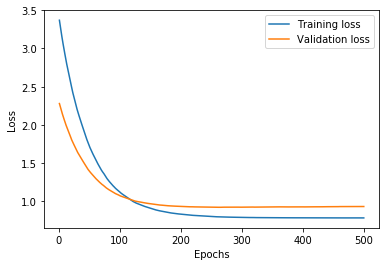

In [32]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

callback_list = [EarlyStopping(patience=5)]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 1ms/sample - loss: 2.6755 - val_loss: 1.8713
Epoch 2/500
105/105==============================] - 0s 39us/sample - loss: 2.6389 - val_loss: 1.8501
Epoch 3/500
105/105==============================] - 0s 43us/sample - loss: 2.6007 - val_loss: 1.8329
Epoch 4/500
105/105==============================] - 0s 40us/sample - loss: 2.5686 - val_loss: 1.8158
Epoch 5/500
105/105==============================] - 0s 40us/sample - loss: 2.5363 - val_loss: 1.7965
Epoch 6/500
105/105==============================] - 0s 48us/sample - loss: 2.5011 - val_loss: 1.7801
Epoch 7/500
105/105==============================] - 0s 40us/sample - loss: 2.4703 - val_loss: 1.7601
Epoch 8/500
105/105==============================] - 0s 51us/sample - loss: 2.4336 - val_loss: 1.7442
Epoch 9/500
105/105==============================] - 0s 67us/sample - loss: 2.4040 - val_loss: 1.7270
Epoch 10/500
105/105==================

Epoch 80/500
105/105==============================] - 0s 39us/sample - loss: 1.1778 - val_loss: 1.0838
Epoch 81/500
105/105==============================] - 0s 49us/sample - loss: 1.1697 - val_loss: 1.0801
Epoch 82/500
105/105==============================] - 0s 52us/sample - loss: 1.1622 - val_loss: 1.0757
Epoch 83/500
105/105==============================] - 0s 71us/sample - loss: 1.1540 - val_loss: 1.0720
Epoch 84/500
105/105==============================] - 0s 52us/sample - loss: 1.1467 - val_loss: 1.0685
Epoch 85/500
105/105==============================] - 0s 43us/sample - loss: 1.1398 - val_loss: 1.0646
Epoch 86/500
105/105==============================] - 0s 46us/sample - loss: 1.1322 - val_loss: 1.0606
Epoch 87/500
105/105==============================] - 0s 44us/sample - loss: 1.1247 - val_loss: 1.0576
Epoch 88/500
105/105==============================] - 0s 50us/sample - loss: 1.1184 - val_loss: 1.0545
Epoch 89/500
105/105==============================] - 0s 43us/sample - lo

Epoch 159/500
105/105==============================] - 0s 39us/sample - loss: 0.8691 - val_loss: 0.9372
Epoch 160/500
105/105==============================] - 0s 39us/sample - loss: 0.8678 - val_loss: 0.9364
Epoch 161/500
105/105==============================] - 0s 54us/sample - loss: 0.8656 - val_loss: 0.9358
Epoch 162/500
105/105==============================] - 0s 60us/sample - loss: 0.8638 - val_loss: 0.9354
Epoch 163/500
105/105==============================] - 0s 46us/sample - loss: 0.8624 - val_loss: 0.9348
Epoch 164/500
105/105==============================] - 0s 60us/sample - loss: 0.8610 - val_loss: 0.9343
Epoch 165/500
105/105==============================] - 0s 44us/sample - loss: 0.8598 - val_loss: 0.9339
Epoch 166/500
105/105==============================] - 0s 57us/sample - loss: 0.8585 - val_loss: 0.9336
Epoch 167/500
105/105==============================] - 0s 55us/sample - loss: 0.8574 - val_loss: 0.9332
Epoch 168/500
105/105==============================] - 0s 41us/s

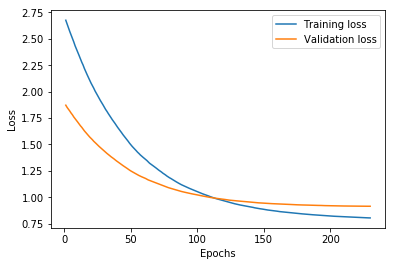

In [35]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 케라스 모델 저장과 복원

In [36]:
model.save_weights('simple_regression.h5')

In [37]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_regression.h5')

In [38]:
model.evaluate(x_test, y_test)

50/50==============================] - 0s 1ms/sample - loss: 0.9703


0.9703411746025086

In [39]:
model.save('simple_model.h5')

In [40]:
from tensorflow.keras.models import load_model

model = load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50==============================] - 0s 1ms/sample - loss: 0.9703


0.9703411746025086

In [41]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

from tensorflow.keras.callbacks import ModelCheckpoint

callback_list = [ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True)]
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120==============================] - 0s 1ms/sample - loss: 3.7105 - val_loss: 2.0793
Epoch 2/500
120/120==============================] - 0s 64us/sample - loss: 3.6552 - val_loss: 2.0487
Epoch 3/500
120/120==============================] - 0s 59us/sample - loss: 3.5991 - val_loss: 2.0185
Epoch 4/500
120/120==============================] - 0s 69us/sample - loss: 3.5449 - val_loss: 1.9882
Epoch 5/500
120/120==============================] - 0s 57us/sample - loss: 3.4897 - val_loss: 1.9595
Epoch 6/500
120/120==============================] - 0s 59us/sample - loss: 3.4379 - val_loss: 1.9315
Epoch 7/500
120/120==============================] - 0s 62us/sample - loss: 3.3867 - val_loss: 1.9041
Epoch 8/500
120/120==============================] - 0s 78us/sample - loss: 3.3372 - val_loss: 1.8779
Epoch 9/500
120/120==============================] - 0s 68us/sample - loss: 3.2887 - val_loss: 1.8516
Epoch 10/500
120/120==================

120/120==============================] - 0s 72us/sample - loss: 1.4261 - val_loss: 0.9352
Epoch 81/500
120/120==============================] - 0s 73us/sample - loss: 1.4137 - val_loss: 0.9303
Epoch 82/500
120/120==============================] - 0s 59us/sample - loss: 1.4019 - val_loss: 0.9255
Epoch 83/500
120/120==============================] - 0s 60us/sample - loss: 1.3903 - val_loss: 0.9207
Epoch 84/500
120/120==============================] - 0s 75us/sample - loss: 1.3788 - val_loss: 0.9160
Epoch 85/500
120/120==============================] - 0s 68us/sample - loss: 1.3671 - val_loss: 0.9114
Epoch 86/500
120/120==============================] - 0s 66us/sample - loss: 1.3556 - val_loss: 0.9069
Epoch 87/500
120/120==============================] - 0s 71us/sample - loss: 1.3446 - val_loss: 0.9026
Epoch 88/500
120/120==============================] - 0s 61us/sample - loss: 1.3339 - val_loss: 0.8985
Epoch 89/500
120/120==============================] - 0s 67us/sample - loss: 1.3236 - 

120/120==============================] - 0s 63us/sample - loss: 0.9299 - val_loss: 0.7772
Epoch 160/500
120/120==============================] - 0s 67us/sample - loss: 0.9271 - val_loss: 0.7769
Epoch 161/500
120/120==============================] - 0s 68us/sample - loss: 0.9247 - val_loss: 0.7766
Epoch 162/500
120/120==============================] - 0s 71us/sample - loss: 0.9222 - val_loss: 0.7763
Epoch 163/500
120/120==============================] - 0s 64us/sample - loss: 0.9197 - val_loss: 0.7760
Epoch 164/500
120/120==============================] - 0s 68us/sample - loss: 0.9173 - val_loss: 0.7758
Epoch 165/500
120/120==============================] - 0s 65us/sample - loss: 0.9150 - val_loss: 0.7755
Epoch 166/500
120/120==============================] - 0s 63us/sample - loss: 0.9126 - val_loss: 0.7753
Epoch 167/500
120/120==============================] - 0s 61us/sample - loss: 0.9102 - val_loss: 0.7751
Epoch 168/500
120/120==============================] - 0s 67us/sample - loss: 

Epoch 238/500
120/120==============================] - 0s 29us/sample - loss: 0.8211 - val_loss: 0.7840
Epoch 239/500
120/120==============================] - 0s 46us/sample - loss: 0.8204 - val_loss: 0.7842
Epoch 240/500
120/120==============================] - 0s 37us/sample - loss: 0.8199 - val_loss: 0.7845
Epoch 241/500
120/120==============================] - 0s 56us/sample - loss: 0.8195 - val_loss: 0.7847
Epoch 242/500
120/120==============================] - 0s 34us/sample - loss: 0.8188 - val_loss: 0.7850
Epoch 243/500
120/120==============================] - 0s 38us/sample - loss: 0.8183 - val_loss: 0.7853
Epoch 244/500
120/120==============================] - 0s 35us/sample - loss: 0.8177 - val_loss: 0.7856
Epoch 245/500
120/120==============================] - 0s 35us/sample - loss: 0.8172 - val_loss: 0.7859
Epoch 246/500
120/120==============================] - 0s 38us/sample - loss: 0.8167 - val_loss: 0.7861
Epoch 247/500
120/120==============================] - 0s 43us/s

Epoch 317/500
120/120==============================] - 0s 37us/sample - loss: 0.7958 - val_loss: 0.8051
Epoch 318/500
120/120==============================] - 0s 31us/sample - loss: 0.7958 - val_loss: 0.8053
Epoch 319/500
120/120==============================] - 0s 35us/sample - loss: 0.7957 - val_loss: 0.8056
Epoch 320/500
120/120==============================] - 0s 33us/sample - loss: 0.7954 - val_loss: 0.8058
Epoch 321/500
120/120==============================] - 0s 33us/sample - loss: 0.7952 - val_loss: 0.8060
Epoch 322/500
120/120==============================] - 0s 34us/sample - loss: 0.7951 - val_loss: 0.8062
Epoch 323/500
120/120==============================] - 0s 37us/sample - loss: 0.7950 - val_loss: 0.8064
Epoch 324/500
120/120==============================] - 0s 49us/sample - loss: 0.7949 - val_loss: 0.8066
Epoch 325/500
120/120==============================] - 0s 36us/sample - loss: 0.7948 - val_loss: 0.8069
Epoch 326/500
120/120==============================] - 0s 31us/s

Epoch 396/500
120/120==============================] - 0s 46us/sample - loss: 0.7898 - val_loss: 0.8195
Epoch 397/500
120/120==============================] - 0s 32us/sample - loss: 0.7897 - val_loss: 0.8196
Epoch 398/500
120/120==============================] - 0s 34us/sample - loss: 0.7897 - val_loss: 0.8198
Epoch 399/500
120/120==============================] - 0s 37us/sample - loss: 0.7896 - val_loss: 0.8199
Epoch 400/500
120/120==============================] - 0s 35us/sample - loss: 0.7897 - val_loss: 0.8201
Epoch 401/500
120/120==============================] - 0s 32us/sample - loss: 0.7896 - val_loss: 0.8202
Epoch 402/500
120/120==============================] - 0s 30us/sample - loss: 0.7896 - val_loss: 0.8203
Epoch 403/500
120/120==============================] - 0s 39us/sample - loss: 0.7896 - val_loss: 0.8204
Epoch 404/500
120/120==============================] - 0s 38us/sample - loss: 0.7896 - val_loss: 0.8205
Epoch 405/500
120/120==============================] - 0s 42us/s

Epoch 475/500
120/120==============================] - 0s 40us/sample - loss: 0.7883 - val_loss: 0.8275
Epoch 476/500
120/120==============================] - 0s 47us/sample - loss: 0.7886 - val_loss: 0.8275
Epoch 477/500
120/120==============================] - 0s 46us/sample - loss: 0.7883 - val_loss: 0.8276
Epoch 478/500
120/120==============================] - 0s 40us/sample - loss: 0.7883 - val_loss: 0.8277
Epoch 479/500
120/120==============================] - 0s 29us/sample - loss: 0.7883 - val_loss: 0.8278
Epoch 480/500
120/120==============================] - 0s 38us/sample - loss: 0.7885 - val_loss: 0.8279
Epoch 481/500
120/120==============================] - 0s 44us/sample - loss: 0.7883 - val_loss: 0.8280
Epoch 482/500
120/120==============================] - 0s 40us/sample - loss: 0.7882 - val_loss: 0.8282
Epoch 483/500
120/120==============================] - 0s 45us/sample - loss: 0.7882 - val_loss: 0.8283
Epoch 484/500
120/120==============================] - 0s 31us/s

Restoring the saved model:

In [42]:
model = load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50==============================] - 0s 1ms/sample - loss: 1.0212


1.0212203574180603

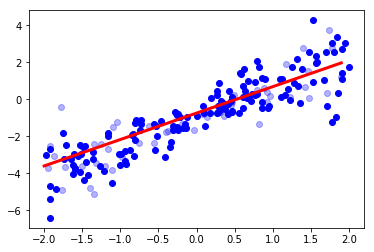

In [43]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
# plt.savefig('images/14_05.png', dpi=400)
plt.show()

## 텐서를 다차원 배열로 변환하기

In [44]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 0.14402906,  0.71120754,  0.27521944, -0.73707145],
       [ 1.39096253,  1.05561972,  0.0764452 , -0.1990654 ],
       [-0.48206527, -0.28935989, -1.16747646, -0.35476874]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 1.05046203,  2.85023996, -1.41889641])>


In [45]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [46]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [47]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=77349, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=77350, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [48]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## Visualizing the graph with TensorBoard

In [49]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [50]:
from tensorflow.keras.callbacks import TensorBoard

callback_list = [TensorBoard()]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 2ms/sample - loss: 14.6074 - val_loss: 9.9960
Epoch 2/500
105/105==============================] - 0s 48us/sample - loss: 14.3126 - val_loss: 9.8000
Epoch 3/500
105/105==============================] - 0s 43us/sample - loss: 14.0206 - val_loss: 9.6254
Epoch 4/500
105/105==============================] - 0s 45us/sample - loss: 13.7543 - val_loss: 9.4431
Epoch 5/500
105/105==============================] - 0s 62us/sample - loss: 13.4687 - val_loss: 9.2650
Epoch 6/500
105/105==============================] - 0s 52us/sample - loss: 13.1935 - val_loss: 9.1059
Epoch 7/500
105/105==============================] - 0s 42us/sample - loss: 12.9461 - val_loss: 8.9283
Epoch 8/500
105/105==============================] - 0s 44us/sample - loss: 12.6730 - val_loss: 8.7570
Epoch 9/500
105/105==============================] - 0s 57us/sample - loss: 12.4154 - val_loss: 8.6039
Epoch 10/500
105/105=========

Epoch 80/500
105/105==============================] - 0s 53us/sample - loss: 3.2654 - val_loss: 2.6654
Epoch 81/500
105/105==============================] - 0s 42us/sample - loss: 3.2128 - val_loss: 2.6271
Epoch 82/500
105/105==============================] - 0s 51us/sample - loss: 3.1567 - val_loss: 2.5919
Epoch 83/500
105/105==============================] - 0s 51us/sample - loss: 3.1057 - val_loss: 2.5605
Epoch 84/500
105/105==============================] - 0s 53us/sample - loss: 3.0587 - val_loss: 2.5273
Epoch 85/500
105/105==============================] - 0s 42us/sample - loss: 3.0104 - val_loss: 2.4973
Epoch 86/500
105/105==============================] - 0s 48us/sample - loss: 2.9658 - val_loss: 2.4637
Epoch 87/500
105/105==============================] - 0s 50us/sample - loss: 2.9182 - val_loss: 2.4338
Epoch 88/500
105/105==============================] - 0s 43us/sample - loss: 2.8747 - val_loss: 2.4049
Epoch 89/500
105/105==============================] - 0s 52us/sample - lo

Epoch 159/500
105/105==============================] - 0s 45us/sample - loss: 1.2228 - val_loss: 1.2818
Epoch 160/500
105/105==============================] - 0s 52us/sample - loss: 1.2114 - val_loss: 1.2746
Epoch 161/500
105/105==============================] - 0s 50us/sample - loss: 1.2010 - val_loss: 1.2672
Epoch 162/500
105/105==============================] - 0s 54us/sample - loss: 1.1918 - val_loss: 1.2616
Epoch 163/500
105/105==============================] - 0s 70us/sample - loss: 1.1829 - val_loss: 1.2546
Epoch 164/500
105/105==============================] - 0s 51us/sample - loss: 1.1737 - val_loss: 1.2485
Epoch 165/500
105/105==============================] - 0s 49us/sample - loss: 1.1653 - val_loss: 1.2407
Epoch 166/500
105/105==============================] - 0s 45us/sample - loss: 1.1557 - val_loss: 1.2372
Epoch 167/500
105/105==============================] - 0s 46us/sample - loss: 1.1497 - val_loss: 1.2307
Epoch 168/500
105/105==============================] - 0s 49us/s

Epoch 238/500
105/105==============================] - 0s 52us/sample - loss: 0.8603 - val_loss: 1.0135
Epoch 239/500
105/105==============================] - 0s 52us/sample - loss: 0.8581 - val_loss: 1.0117
Epoch 240/500
105/105==============================] - 0s 50us/sample - loss: 0.8564 - val_loss: 1.0091
Epoch 241/500
105/105==============================] - 0s 61us/sample - loss: 0.8537 - val_loss: 1.0077
Epoch 242/500
105/105==============================] - 0s 57us/sample - loss: 0.8518 - val_loss: 1.0072
Epoch 243/500
105/105==============================] - 0s 55us/sample - loss: 0.8508 - val_loss: 1.0060
Epoch 244/500
105/105==============================] - 0s 43us/sample - loss: 0.8492 - val_loss: 1.0043
Epoch 245/500
105/105==============================] - 0s 59us/sample - loss: 0.8476 - val_loss: 1.0028
Epoch 246/500
105/105==============================] - 0s 44us/sample - loss: 0.8458 - val_loss: 1.0011
Epoch 247/500
105/105==============================] - 0s 45us/s

Epoch 317/500
105/105==============================] - 0s 48us/sample - loss: 0.7934 - val_loss: 0.9531
Epoch 318/500
105/105==============================] - 0s 47us/sample - loss: 0.7934 - val_loss: 0.9528
Epoch 319/500
105/105==============================] - 0s 52us/sample - loss: 0.7930 - val_loss: 0.9521
Epoch 320/500
105/105==============================] - 0s 48us/sample - loss: 0.7929 - val_loss: 0.9513
Epoch 321/500
105/105==============================] - 0s 49us/sample - loss: 0.7926 - val_loss: 0.9507
Epoch 322/500
105/105==============================] - 0s 47us/sample - loss: 0.7923 - val_loss: 0.9509
Epoch 323/500
105/105==============================] - 0s 45us/sample - loss: 0.7923 - val_loss: 0.9504
Epoch 324/500
105/105==============================] - 0s 48us/sample - loss: 0.7922 - val_loss: 0.9499
Epoch 325/500
105/105==============================] - 0s 50us/sample - loss: 0.7915 - val_loss: 0.9500
Epoch 326/500
105/105==============================] - 0s 48us/s

Epoch 396/500
105/105==============================] - 0s 63us/sample - loss: 0.7816 - val_loss: 0.9388
Epoch 397/500
105/105==============================] - 0s 50us/sample - loss: 0.7814 - val_loss: 0.9390
Epoch 398/500
105/105==============================] - 0s 55us/sample - loss: 0.7814 - val_loss: 0.9389
Epoch 399/500
105/105==============================] - 0s 57us/sample - loss: 0.7813 - val_loss: 0.9385
Epoch 400/500
105/105==============================] - 0s 48us/sample - loss: 0.7812 - val_loss: 0.9383
Epoch 401/500
105/105==============================] - 0s 73us/sample - loss: 0.7811 - val_loss: 0.9381
Epoch 402/500
105/105==============================] - 0s 41us/sample - loss: 0.7812 - val_loss: 0.9383
Epoch 403/500
105/105==============================] - 0s 46us/sample - loss: 0.7812 - val_loss: 0.9382
Epoch 404/500
105/105==============================] - 0s 48us/sample - loss: 0.7813 - val_loss: 0.9390
Epoch 405/500
105/105==============================] - 0s 48us/s

Epoch 475/500
105/105==============================] - 0s 51us/sample - loss: 0.7796 - val_loss: 0.9350
Epoch 476/500
105/105==============================] - 0s 55us/sample - loss: 0.7796 - val_loss: 0.9347
Epoch 477/500
105/105==============================] - 0s 71us/sample - loss: 0.7797 - val_loss: 0.9344
Epoch 478/500
105/105==============================] - 0s 63us/sample - loss: 0.7796 - val_loss: 0.9343
Epoch 479/500
105/105==============================] - 0s 44us/sample - loss: 0.7796 - val_loss: 0.9344
Epoch 480/500
105/105==============================] - 0s 42us/sample - loss: 0.7795 - val_loss: 0.9344
Epoch 481/500
105/105==============================] - 0s 53us/sample - loss: 0.7796 - val_loss: 0.9339
Epoch 482/500
105/105==============================] - 0s 48us/sample - loss: 0.7795 - val_loss: 0.9342
Epoch 483/500
105/105==============================] - 0s 52us/sample - loss: 0.7796 - val_loss: 0.9341
Epoch 484/500
105/105==============================] - 0s 48us/s

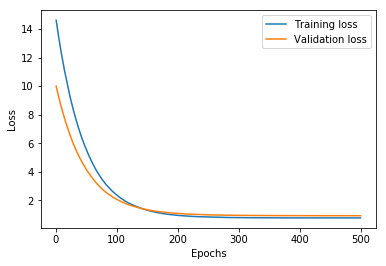

In [51]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()